#BASIC INFORMATION (ReadMe)



**1.   What is Jupyter Notebook and Google Colab?**
- Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning etc.
- Google Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud. 

**2.   What will we do in this lab?**

- In this lab we will explore and use Melbourne housepricing dataset.  Each row in the dataset is a housing sale and columns are the features of the sold house/appartment.


> Data source: https://www.kaggle.com/anthonypino/melbourne-housing-market

- The goal is to predict the price of new sales. We will build two supervised models: regression models and artificial neural network. ML pipeline outlined in the theory part of the course will be followed. 

**3.   How do I run/execute cell of code?**

Mark the cell,  press "Run" button on the left side of the cell or Ctrl+Shift tab through the code.


**4.  How do I save my own version of the Jupyter notebook?**

Go to File and choose "Save a copy in Drive".

#1) CLONE ENVIRONMENT & IMPORT LIBRARIES


- Run the below code cell if the notebook is opened in Google Collab. It will clone the github repository to get all necessary files.

In [0]:
!git clone https://github.com/NordAxon/AI-For-Leaders.git

Cloning into 'AI-For-Leaders'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 93 (delta 6), reused 13 (delta 4), pack-reused 78
Unpacking objects: 100% (93/93), done.
Checking out files: 100% (27/27), done.


- ML with Python offers a great deal of libraries.
- Read about some of the most used: https://hackernoon.com/top-10-libraries-in-python-to-implement-machine-learning-12602cf5dc61

- Lets import all the libraries we need to run the code and perform the analysis. Run the below code cell.

In [0]:
import numpy as np
import pandas as pd
import matplotlib as plt
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import keras
%load_ext autoreload
%autoreload 2
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

np.random.seed(1)

Using TensorFlow backend.


# 2) IMPORT RAW DATA

In [0]:
housing_df_original = pd.read_csv('AI-For-Leaders/data/melbourne-housing-market/Melbourne_housing.csv')
housing_df_original

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
1,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
2,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
3,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,3.0,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.79650,144.99650,Northern Metropolitan,4019.0
4,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019.0
5,Abbotsford,121/56 Nicholson St,2,u,NaN,PI,Biggin,7/11/2016,2.5,3067.0,2.0,2.0,1.0,4292.0,82.0,2009.0,Yarra City Council,-37.80780,144.99650,Northern Metropolitan,4019.0
6,Abbotsford,17 Raphael St,4,h,NaN,W,Biggin,7/11/2016,2.5,3067.0,6.0,2.0,0.0,230.0,147.0,1860.0,Yarra City Council,-37.80660,144.99360,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019.0
8,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra City Council,-37.80100,144.99890,Northern Metropolitan,4019.0
9,Abbotsford,2 Rich St,2,h,NaN,SP,Biggin,10/12/2016,2.5,3067.0,2.0,1.0,1.0,176.0,80.0,1925.0,Yarra City Council,-37.79980,144.99720,Northern Metropolitan,4019.0


In [0]:
# Size of the dataset (X, Y)
housing_df_original.shape

(13742, 21)

# 3) EXPLORE DATA & PRE-PROCESSING

##  3.1. Fill in empty/missing data

- In some of the columns we have NaN(Not a Number) values i.e. missing data.

- Many ML algorithms need data in all rows and columns so the NaNs have to be filled with something meaningful. E.g. "Landsize" will be filled with 0 to indicate that there is no land contained in the real estate sale. 

- Let's first have a look at how many NaN values are present in each column. Run the below code cell



 


In [0]:
print('Number of NaNs')
print(pd.isnull(housing_df_original).sum())

Number of NaNs
Suburb              0
Address             0
Rooms               0
Type                0
Price            3086
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car               232
Landsize         1602
BuildingArea        0
YearBuilt         504
CouncilArea         0
Lattitude           9
Longtitude          9
Regionname          0
Propertycount       0
dtype: int64


Lets clean and fill/replace missing/odd values: 
- Remove rows where there is no price
- Fill NaN values in columns BuildingArea, Rooms, Landsize, Car, Bathroom, Bedroom2 with 0
- For column YearBuilt, fill with the mean value of that column since the house being built at year 0 seems unlikely

In [0]:
housing_df_no_nan = housing_df_original.copy()

# Remove all rows with no price data
housing_df_no_nan = housing_df_no_nan[pd.notnull(housing_df_no_nan['Price'])]

# Replace NaN values with 0 values in columns BuildingArea, Rooms, Landsize, Car, Bathroom, Bedroom2 
housing_df_no_nan['BuildingArea'].fillna(0.0, inplace=True)
housing_df_no_nan['Rooms'].fillna(0.0, inplace=True)
housing_df_no_nan['Landsize'].fillna(0.0, inplace=True)
housing_df_no_nan['Car'].fillna(0.0, inplace=True)
housing_df_no_nan['Bathroom'].fillna(0.0, inplace=True)
housing_df_no_nan['Bedroom2'].fillna(0.0, inplace=True)

# Replace NaN values in YearBuilt column with mean value of that column
housing_df_no_nan['YearBuilt'].fillna(housing_df_no_nan['YearBuilt'].mean(), inplace=True)

##**3.2. Plot variable correlations and histograms**

- Let's have a look at how different variables relate to each other and how the data is distributed. 
- The goal is to get insight in our dataset, understand how different columns relate to each other and look for outliers.
- Let pick some columns(variables) we think might be good predictors of price and scatter plot those against each other and as histograms along the diagonal. 


,Price,BuildingArea,Rooms,Landsize,Car,Bathroom
count,1.065600e+04,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000
mean,1.087051e+06,156.834586,3.107170,464.293450,1.681963,1.658596
std,6.771761e+05,449.222791,0.960389,1149.411449,0.987162,0.719114
min,1.310000e+05,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6.400000e+05,100.000000,3.000000,116.000000,1.000000,1.000000
50%,8.925000e+05,133.000000,3.000000,387.000000,2.000000,2.000000
75%,1.330000e+06,182.000000,4.000000,629.000000,2.000000,2.000000
max,9.000000e+06,44515.000000,12.000000,44500.000000,10.000000,9.000000


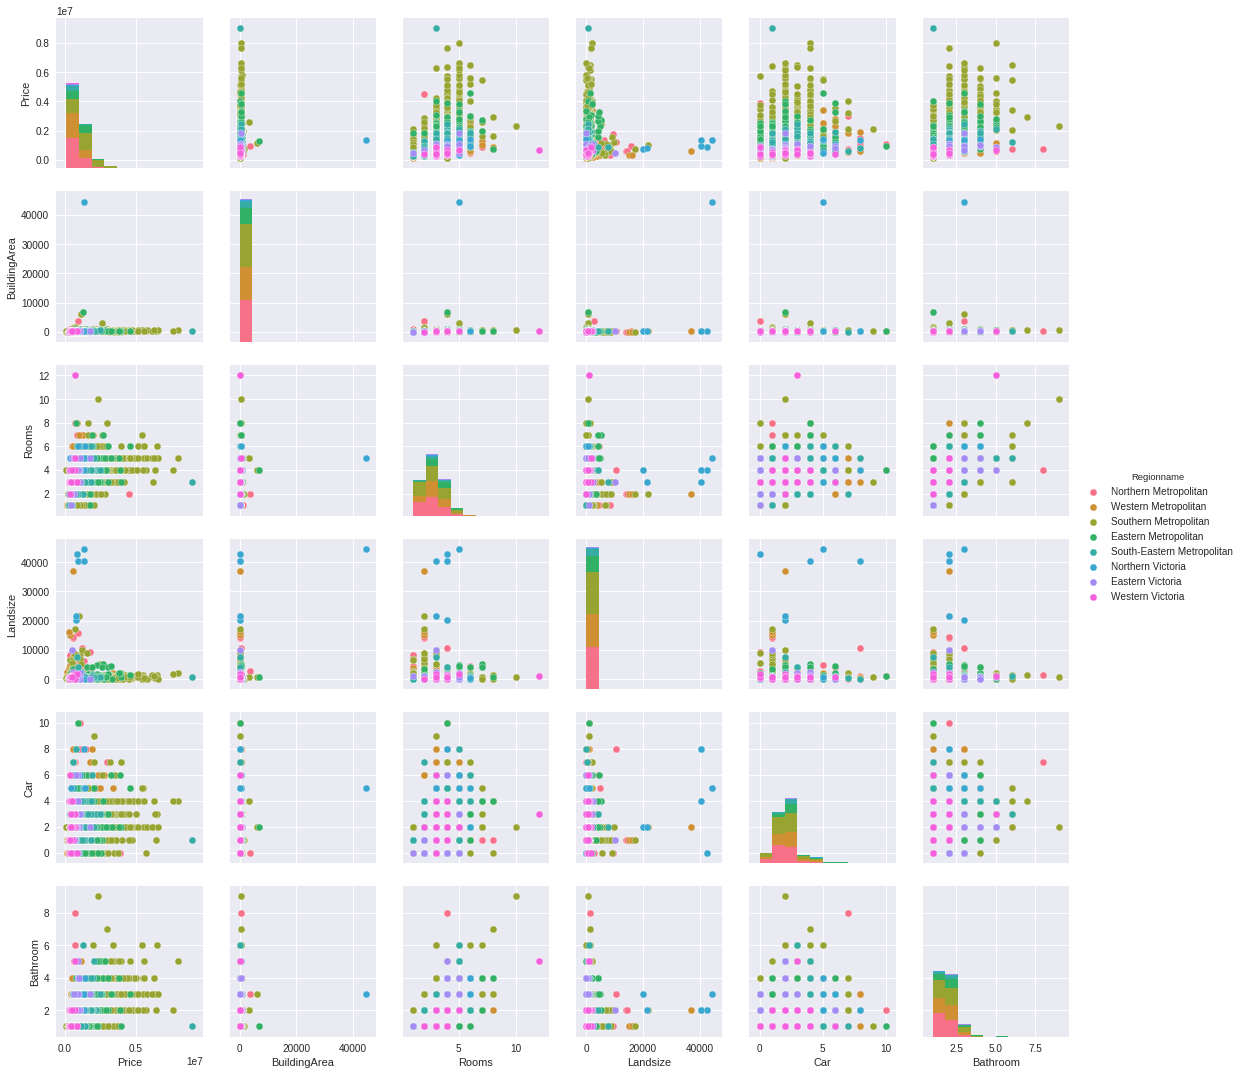

In [0]:
g = sns.pairplot(housing_df_no_nan[['Price', 'BuildingArea', 'Rooms', 'Landsize', 'Car', 'Bathroom', 'Regionname']], hue="Regionname", diag_kind='hist')

housing_df_no_nan[['Price', 'BuildingArea', 'Rooms', 'Landsize', 'Car', 'Bathroom', 'Regionname']].describe()

## 3.3. Remove outliers

- Outliers are datapoints located far from the other data points, these come with a risk of skewing the models and therefore we want to remove these. 

- In the plots above it seems like we have outliers in some of the columns. We will have a deeper look at some columns which seem to contain outliers. 

- Run the cell below to see a plot of price where it is clear that we have some data points which are far away from the others. 

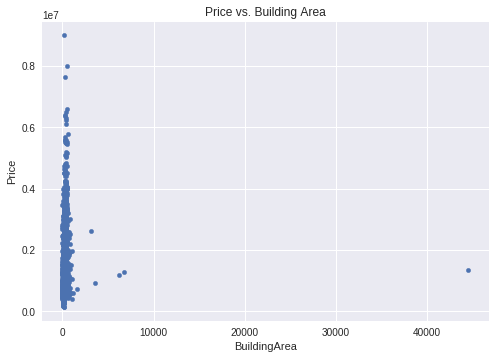

In [0]:
housing_df_no_nan.plot.scatter('BuildingArea', 'Price', title='Price vs. Building Area')

- Set clip-off at 500 for building areaso that all data points larger than 500 will be set to 500 instead. 
- Set clip-off at 4 000 000 for price. 
- Plot again! 

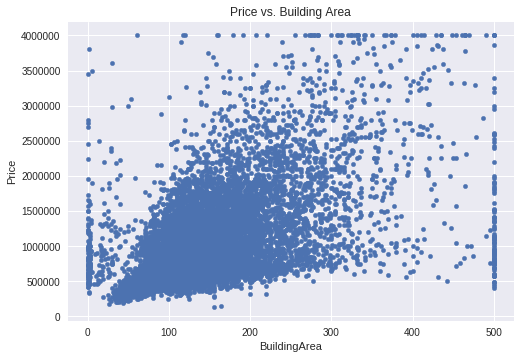

In [0]:
housing_clipped = housing_df_no_nan.copy()
housing_clipped['BuildingArea'] = housing_clipped['BuildingArea'].clip(0, 500)
housing_clipped['Price'] = housing_clipped['Price'].clip(0, 4e6)
housing_clipped.plot.scatter('BuildingArea', 'Price', title='Price vs. Building Area')

### *** Assignment 1 ***

-  Plot "Rooms" vs "Price" in the below empty cell to see if there are any outliers.
-  If so, what could be a resonable cut-off?
-  Clip the data set to remove Room outliers, i.e replace the value of variable rooms_max with a resonable number. bold text

In [0]:
# ENTER CODE HERE

In [0]:
# Filter out or clip outliers
rooms_max = 200
housing_clipped_r = housing_clipped.copy()
housing_clipped_r['Rooms'] = housing_clipped_r['Rooms'].clip(0, rooms_max)

## 3.4 Plot histograms for indicative columns
- Lets have a look more closely at the variables we think could be interesting by plotting larger histograms.

In [0]:
housing_clipped_r['BuildingArea'].hist(bins=40, figsize=(10,7))
plt.title('Histogram of Building Areas');
# TODO: Make it better

### *Assignment 2: *

- Create a histogram of column Price in the empty cell below.

In [0]:
# CODE HERE

## 3.5 Price for different regions
- We are also hypothesising that the property location will have an impact on price. 
- Below a plot will be made to get a feel for how different locations might affect the price. 

In [0]:
plt.figure(figsize=(10,7))
housing_clipped_r.groupby('Regionname')['Price'].mean().plot.bar();

### *Assignment 3: *
- Plot Price for Different CouncilArea

In [0]:
# CODE HERE

# 4) MODELLING: SIMPLE DIMENSIONAL LINEAR REGRESSION

- We are getting a feel for what the data looks like, so now we might try a first model for predicting price. 
- The simple linear regression, one predictor variable (X) and one output variable (Y)  is very commonly used model. 

- We pick the building area as a predictor to begin with since there seem to be a correlation between building area and price according to our exploration. 

- The goal is to find all of the weights, $w_i$, in the following linear regression model. 


> $y = w_0 + w_1x_1$







## 4.1 Split dataset, pick algorithm, train model



In [0]:
# Set up input and output variables
y = housing_clipped_r['Price']
x = housing_clipped_r[['BuildingArea']]

# Split into test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

# Set up regression model
regr = linear_model.LinearRegression()

# Train the regression model
regr.fit(x_train, y_train)

# Perform predictions
y_pred = regr.predict(x_test)

# Print regression coefficients, w
print(regr.coef_)

# Plot results
plt.figure(figsize=(15,10));
plt.plot(x_test, y_pred, 'r');
plt.scatter(x_test.values, y_test.values, alpha=0.1);
plt.title('Simple Linear Regression Model');

NameError: ignored

## 4.2 Model evaluation
The error value will be compared to a baseline error which is the error if the prediction is just the mean of previous house values. 

In [0]:
# Evaluate Results
mean_error = (y_pred - y_test).abs().mean()
mean_error_baseline = (y_train.mean() - y_test).abs().mean()
print('\nBaseline Mean Error: ' + str(mean_error_baseline))
print('Model Mean Absolute Error: ' + str(mean_error))

# 5) MODELLING: MULTI-DIMENSIONAL LINEAR REGRESSION

- In order to increase the predictive power, i.e. to get a more accurate model, more information can be added to the model. 
- One way of doing that is by adding more input variables to the model. 
- Variables that could be tried are BuildingArea, Rooms, LandSize, Car. 


> $y = w_0 + w_1x_1 + w_2x_2 + \dots$


## 5.1 Split dataset, pick algorithm, train model

In [0]:
feature_list = ['BuildingArea', 'Rooms', 'Landsize', 'Car']

In [0]:
x = housing_clipped_r[feature_list]
y = housing_clipped_r['Price']

# Split into test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

# Set up regression model
regr = linear_model.LinearRegression()

# Train the regression model
regr.fit(x_train, y_train)

# Perform predictions
y_pred = regr.predict(x_test)

# Print regression coefficients, w
print('Regression Coefficients, w0, w1, w2, ...')
print(regr.coef_)

## 5.2 Model evaluation

In [0]:
# Evaluate Results
mean_error = (y_pred - y_test).abs().mean()
print('\nMean Error Multi-Dimensional Linear Regression: ' + str(mean_error))

### *Assignment 4: *
- Add the data column 'Car' to the input data and see if your results change.

# 6) MODELLING: ARTIFICAL NEURAL NETWORK


## Split dataset, pick algorithm, train & evaluate model

The code in the following cell transforms data, builds a neural network and evaluates results of predictions from the neural net.

In [0]:
# from numpy.random import seed
# seed(1)
# Filter out the wanted columns

def run_neural_network(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

    # Scale the data
    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    y_train = scaler.fit_transform(y_train.values.reshape(len(y_train),1))
    y_test = scaler.transform(y_test.values.reshape(len(y_test),1))

    # define the neural network structure
    model = Sequential()
    model.add(Dense(100, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error'])

    # train the model
    history = model.fit(x_train, y_train, epochs=15, verbose=0, validation_data=(x_test, y_test))

    # make a prediction
    y_pred = model.predict(x_test)[:,0]
    # show the inputs and predicted outputs

    y_pred = scaler.inverse_transform(y_pred.reshape(len(y_pred),1))
    y_test = scaler.inverse_transform(y_test)

    # Evaluate Results
    mean_error = (pd.Series(y_pred[:,0]) - y_test[:,0]).abs().mean()
    print('Mean Absolute Test Error: ' + str(mean_error))

    # Plot error over training time
    plt.figure(figsize=(10,7))
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['val_mean_squared_error'])
    plt.title('Model Loss')
    plt.ylabel('Mean Squared Error')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
run_neural_network(housing_clipped_r[feature_list], housing_clipped_r['Price'])

## *Assignment 5 *
Try different number of training epochs by adjusting the code above.
-  What happens with the loss for a higher amount of training epochs(time)?



## *Assignment 6 *
Try different sizes of the network  by adjusting the code above.
-  What are the results when more layers are added? 
-  What are the results when more neurons in each layer is added.
-  Why is there a difference between train and test data in absolute error? 



## *Assignment 7 *
Trying adding more features  by adjusting the code above.
-  Which columns could be useful for providing more predictive power?

## *Questions:*
-  Which of the different models performed best? Why?
-  Why does a well tuned neural network perform better than a linear regression model?
-  What could be done to increase predictive power?
-  Which additional data do you think would make a large differce in predictive power?
-  What was the lowest mean square error you got?

## Extra code and assignments improving our NN
Adding more features:
- Let's look at the data to see what we can do with the data to create columns which are more easily readable for a ML algorithm and how we can provide more information from the data we have. 
- Lets try and make the predictive model as good as possible by adding more features such as location and age of property. 

### Assignment 8: 
Modify code below to include CouncilArea in addition to Regionname 

In [0]:
# One-hot encoding of Region
one_hot_region = pd.get_dummies(housing_clipped_r.Regionname, prefix='Regionname')
housing_df_feature = pd.concat([housing_clipped_r, one_hot_region], axis=1)
one_hot_region

### Adding house age as a feature
- Using the build year of a house directly as a feature is not good since most values will be around 2000. 
- A small difference in feature might be a big difference in actual house value; e.g. a house built 2017 is probably a lot more valuable than a house build 2007, but that is still a small percentual difference. The percentual difference between the age of 1 year and 11 years on the other hand gives a large difference. 
- We also log-transform the age to make it a bit more convenient for machine learning algorithms. 

In [0]:
#(2018. - housing_df_feature['YearBuilt']).apply(lambda x: np.log(x))
housing_df_feature['YearBuilt'] = housing_df_feature['YearBuilt'].clip(0, 2018)
house_ages = pd.Series(np.log((1 + (2018. - housing_df_feature['YearBuilt']))))
(2018. - housing_df_feature['YearBuilt']).hist(bins=30)
plt.title('Distribution before logarithm')
housing_df_feature['Age'] = house_ages
plt.figure()
house_ages.hist()
plt.title('Distribution After logarithm')

### Trying NN with new features
With new features added it is time to train the neural network again, run the next cell and check the results. 

In [0]:
new_feature_list = ['BuildingArea', 'Rooms', 'Landsize', 'Car', 'Age'] + list(one_hot_region.columns)

run_neural_network(housing_df_feature[new_feature_list], housing_df_feature['Price'])

### *Assignment 9:*
- Check the original data to see if there are other features(columns) which might generate even better predictions if they are part of the model. 
- Write code below to add these new features and train a new network

In [0]:
# CODE HERE